<a href="https://colab.research.google.com/github/scoopcash/jan12---13.3-Advanced-Topics-in-Neural-Networks/blob/main/Colab_ins_overfitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Overfitting

In [1]:
import pandas as pd
import numpy as np

In [2]:
from keras.models import Sequential
from keras.layers import Dense, Activation

In [4]:
from google.colab import files
uploaded = files.upload()

Saving meet_or_beat.csv to meet_or_beat.csv


In [5]:
df = pd.read_csv('meet_or_beat.csv')

In [6]:
df

,EPS,forecasted_eps,noOfEsts,after_total_returns,before_total_returns
0,2.01,1.67,11.0,0.051444,0.018585
1,0.17,0.19,6.0,0.112955,-0.000510
2,-0.07,0.14,4.0,0.077167,-0.046104
3,0.48,0.51,8.0,-0.006130,-0.004899
4,-0.24,-0.27,9.0,0.089762,-0.025466
...,...,...,...,...,...
71963,0.31,0.30,4.0,0.006035,0.016854
71964,-0.65,-0.66,3.0,0.179327,-0.039052
71965,0.27,0.28,3.0,0.059002,0.141599
71966,0.11,0.10,4.0,-0.035755,0.026346


### Preparing the Data

In [7]:
df['earnings_quartile']= (pd.qcut(df['EPS'], q=5, labels =False))+1

In [8]:
df['earnings_quartile'].value_counts()

2    14676
1    14555
5    14268
4    14251
3    14218
Name: earnings_quartile, dtype: int64

In [9]:
y_quartile= df['earnings_quartile']

In [10]:
number_classes = len(y_quartile.unique())

In [11]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(y_quartile)
encoded_y = encoder.transform(y_quartile)
encoded_y

array([4, 2, 1, ..., 2, 1, 0])

In [30]:
from keras.utils.np_utils import to_categorical

y_categorical = to_categorical(encoded_y, num_classes=number_classes)

In [31]:
X=df[['forecasted_eps','before_total_returns','noOfEsts']]

### Building the Model

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, random_state=1)

In [33]:
y_train

array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.]], dtype=float32)

In [34]:
number_of_predictors = len(X.columns)
number_of_predictors

3

In [35]:
from keras.layers import Dropout
from keras.regularizers import l1,l2

In [36]:
model = Sequential()

model.add(
    Dense(10, input_dim = number_of_predictors, activation='relu')
)
model.add(
    Dropout(.2, input_shape=(10,))
)
model.add(
    Dense(number_classes, activation = 'relu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01))
)
model.add(
    Dense(number_classes, activation='softmax')
)

In [40]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])

In [41]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 10)                40        
                                                                 
 dropout_1 (Dropout)         (None, 10)                0         
                                                                 
 dense_4 (Dense)             (None, 5)                 55        
                                                                 
 dense_5 (Dense)             (None, 5)                 30        
                                                                 
Total params: 125
Trainable params: 125
Non-trainable params: 0
_________________________________________________________________


In [42]:
model.fit(X_train, y_train, epochs=50, batch_size=1000, validation_split=0.2, shuffle=True)

Epoch 1/50
44/44 [==============================] - 1s 8ms/step - loss: 2.0390 - categorical_accuracy: 0.2566 - val_loss: 1.8421 - val_categorical_accuracy: 0.3386
Epoch 2/50
44/44 [==============================] - 0s 3ms/step - loss: 1.8226 - categorical_accuracy: 0.2719 - val_loss: 1.7255 - val_categorical_accuracy: 0.3887
Epoch 3/50
44/44 [==============================] - 0s 3ms/step - loss: 1.7212 - categorical_accuracy: 0.2773 - val_loss: 1.6639 - val_categorical_accuracy: 0.3397
Epoch 4/50
44/44 [==============================] - 0s 4ms/step - loss: 1.6695 - categorical_accuracy: 0.2656 - val_loss: 1.6260 - val_categorical_accuracy: 0.2829
Epoch 5/50
44/44 [==============================] - 0s 3ms/step - loss: 1.6273 - categorical_accuracy: 0.2497 - val_loss: 1.5929 - val_categorical_accuracy: 0.2577
Epoch 6/50
44/44 [==============================] - 0s 3ms/step - loss: 1.5911 - categorical_accuracy: 0.2531 - val_loss: 1.5543 - val_categorical_accuracy: 0.2590
Epoch 7/50
44/44

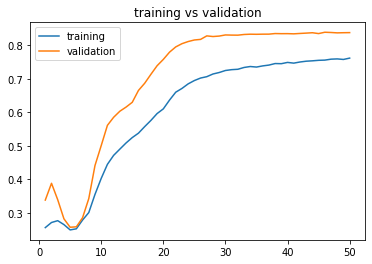

In [44]:
model_history = model.history.history
model_history.keys()



training_results = pd.DataFrame(index=range(1,51))
training_results['training'] = model_history['categorical_accuracy']
training_results['validation'] = model_history['val_categorical_accuracy']
training_results.plot(title='training vs validation')